# DAT 402 Project 1
- Marisa Thomas & Dylan Campbell

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

## 🏈 NFL Playoff Prediction: Dataset 🏈
- **Dataset Name:** NFL Team-Level Stats (2018-2023)
- **Source:** [Pro Football Reference](https://www.pro-football-reference.com/)
- **Target Variable:** `MadePlayoffs`
- The dataset includes a variety of regular season performance metrics that may influence whether a team qualifies for the playoffs.


To build this dataset, we manually compiled and cleaned multiple sources of indivdual team data from [Pro Football Reference](https://www.pro-football-reference.com/) for each season from 2018 to 2023. This involved:
- Regular season standings (wins, losses, point differntials, etc.)
- Advanced team statistics (SRS, strength of schedule, yards per play, etc.)
- Offesnsive and defensive performance metrics

Each season's data was collected separately and then merged into one cohesive CSV file for analysis. This required aligning team names, engineering consistent feature formats, and creating a target variable (`MadePlayoffs`) to indicate postseason qualification.

---

### The dataset contains features such as:
- `PointsScored`
- `PointsAllowed`
- `YardsPerPlay`
- `Turnovers`
- `RushingYards` and `PassingYards`
- `SimpleRatingSystem` (SRS)
- `StrengthOfSchedule` (SoS)
- `Penalties` and `PenaltyYards`
- `ScoringDrive%` and `TurnoverDrive%`
- `Season` (2018-2023)
- `Team` (name)

Each row represents one NFL team in one season, with all stats coming from the regular season only. The target column `MadePlayoffs` is a binary variable where 1 means the team made the playoffs, and 0 means they did not.

In [1]:
# Loading data
df = pd.read_csv("NFL_Data.csv")
target = ['MadePlayoffs']

display(df.head(4))
print("df shape:", df.shape)

NameError: name 'pd' is not defined

In [ ]:
#check for missing values in the data
df.isnull().sum()

Team                     0
Season                   0
PointsScored             0
PointsAllowed            0
PercentageCompleted      0
PassingYards             0
PassingTDs               0
PasserRating             0
SacksTaken               0
SackYardsLost            0
RushingAttempts          0
RushingYards             0
RushingTDs               0
OffensivePlays           0
TotalYards               0
YardsPerPlay             0
FieldGoalAttempts        0
FieldGoalsMade           0
ExtraPointAttempts       0
ExtraPointsMade          0
TimesPunted              0
PuntYards                0
FirstDowns               0
ThirdDownConversions     0
ThirdDownAttempts        0
FourthDownConversions    0
FourthDownAttempts       0
PenaltiesCommitted       0
PenaltyYards             0
FumblesLost              0
InterceptionsThrown      0
TurnoversLost            0
Win                      0
MarginOfVictory          0
StrengthOfSchedule       0
TeamRating               0
OffenseRating            0
D

### Merging and Cleaning the Data
Before building our model, we first collected and cleaned raw data from two separate CSV files:
- `AFC Regular Season Stats 2018-2023.csv`
- `NFC Regular Season Stats 2018-2023.csv`


In [ ]:
#Load both CSVs
afc_df = pd.read_csv("AFC Regular Season Stats 2018-2023.csv")
nfc_df = pd.read_csv("NFC Regular Season Stats 2018-2023.csv")

display(afc_df.head(4))
display(nfc_df.head(4))

print("AFC shape:", afc_df.shape)
print("NFC Shape:", nfc_df.shape)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Score,Unnamed: 9,...,Downs,Unnamed: 40,Unnamed: 41,Unnamed: 42,Penalties,Unnamed: 44,Turnovers,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,Tm,Rk,Gtm,Week,Date,Day,Home/Away,Opp,Rslt,Pts,...,3DConv,3DAtt,4DConv,4DAtt,Pen,Yds,FL,Int,TO,ToP
1,New England Patriots,1,1,1,9/9/2018,Sun,Home,HOU,W,27,...,4,14,1,1,6,36,2,1,3,31:10:00
2,New England Patriots,2,2,2,9/16/2018,Sun,Away,JAX,L,20,...,4,12,0,0,2,25,1,0,1,29:14:00
3,New England Patriots,3,3,3,9/23/2018,Sun,Away,DET,L,10,...,2,9,0,1,5,38,0,1,1,20:45


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Score,...,Downs,Unnamed: 41,Unnamed: 42,Unnamed: 43,Penalties,Unnamed: 45,Turnovers,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,Tm,Div,Rk,Gtm,Week,Date,Day,Home/Away,Opp,Rslt,...,3DConv,3DAtt,4DConv,4DAtt,Pen,Yds,FL,Int,TO,ToP
1,Dallas Cowboys,NFC EAST,1,1,1,9/9/2018,Sun,Away,CAR,L,...,2,11,0,1,10,85,1,0,1,29:24:00
2,Dallas Cowboys,NFC EAST,2,2,2,9/16/2018,Sun,Home,NYG,W,...,3,10,1,1,6,47,0,0,0,27:48:00
3,Dallas Cowboys,NFC EAST,3,3,3,9/23/2018,Sun,Away,SEA,L,...,3,13,1,2,7,55,1,2,3,27:16:00


AFC shape: (1566, 49)
NFC Shape: (1585, 50)


After this, we had to build a complete and clean dataset from our two csv files. 

### Steps:
- Dropped irrelevant or non-numeric columns such as Opp, Home/Away,and raw date labels.
- Renamed columns for clarity - e.g., `Yds.1` --> `SackYardsLost`,  `Pts` --> `PointsScored`, etc.
- Converted columns like `Date` To actual `datetime` objects and used them to assign a `Season` column.
- Created a binary column `Win` where each game result was encoded (1 = Win, 0 = Loss/Tie).
- Aggregated all team-level stats, summing most stats and averaging others.
- Concatenated cleaned AFC and NFC datasets into a single dataframe.
- Merged with the cleaned standings data to bring in `TeamRating`, `StrengthOfSchedule`, `OffenseRating`, and `DefenseRating`.
- Performed final column cleaning (removing `*` and `+` from team names) and exported the resulting dataset as:
    - `NFL_Data.csv`


## Exploratory Data Analysis

In this section, we explore the relationships between regular season performance metrics and playoff appearances from 2018 to 2023. The goal is to identify patterns and key features that differ between teams that made the playoffs and those that did not.

### Team Rating vs Strength of Schedule
The scatterplot below shows the relationship between a team's rating (overall performance) and their strength of schedule. Playoff teams tend to have higher overall ratings, regardless of schedule difficulty.

Green = Made Playoffs

Red = Missed Playoffs

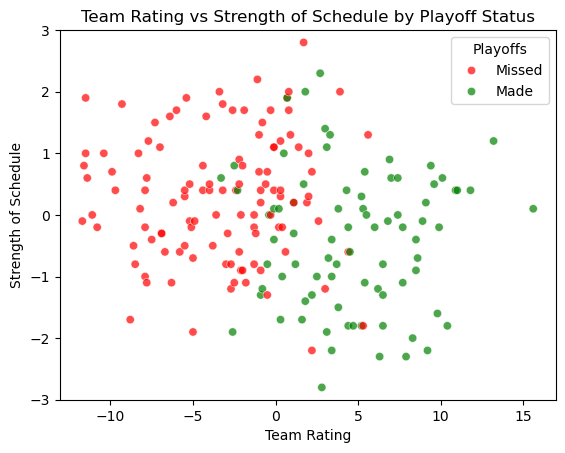

In [ ]:
sns.scatterplot(
  x='TeamRating',
  y='StrengthOfSchedule',
  hue='MadePlayoffs',
  palette={0: 'red', 1: 'green'},
  data=df,
  alpha=0.7
)

plt.title('Team Rating vs Strength of Schedule by Playoff Status')
plt.ylabel('Strength of Schedule')
plt.xlabel('Team Rating')
plt.ylim(-3, 3)

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Missed', 'Made']
plt.legend(handles, labels, title="Playoffs")
plt.show()

### Correlation with Playoff Apperances.

To understand which features are most impactful, we computed a correlation matrix using numeric variables. Below are the features most positively and negatively correlated with making the playoffs.

This helps identify which regular season statistics are most predictive of postseason success.

In [ ]:
# Using a correlation matrix to determine which of the variables are most impactful on making the playoffs.
# Set the original dataframe to a numbers-only dataframe.
numbers_df = df.select_dtypes(include=[np.number])
corr_matrix = numbers_df.corr()
corr_matrix.to_csv("Correlation_Matrix.csv")


# Removed 'MadePlayoffs' and 'PlayoffWin' rows, displayed top 10 positive correlation values.
corr_with_playoffs = corr_matrix['MadePlayoffs'].sort_values(ascending=False)
corr_with_playoffs_pos = corr_with_playoffs.sort_values(ascending=False)
corr_with_playoffs_pos = corr_with_playoffs_pos.drop(['MadePlayoffs', 'PlayoffWin'], axis=0)
print("Positive Correlation For Reaching Playoffs:")
print(corr_with_playoffs_pos.head(10))

# Displayed top 10 negative correlation values.
corr_with_playoffs_neg = corr_with_playoffs.sort_values(ascending=True)
print("Negative Correlation For Reaching Playoffs:")
print(corr_with_playoffs_neg.head(10))

Positive Correlation For Reaching Playoffs:
Win                   0.799384
MarginOfVictory       0.724007
TeamRating            0.703757
PointsScored          0.640614
OffenseRating         0.626316
ExtraPointAttempts    0.624948
ExtraPointsMade       0.620142
PasserRating          0.559088
TotalYards            0.520989
PassingTDs            0.499054
Name: MadePlayoffs, dtype: float64
Negative Correlation For Reaching Playoffs:
PointsAllowed         -0.488930
SackYardsLost         -0.433766
SacksTaken            -0.406527
TimesPunted           -0.384412
InterceptionsThrown   -0.356647
PuntYards             -0.356331
TurnoversLost         -0.351994
StrengthOfSchedule    -0.314240
FourthDownAttempts    -0.259384
FumblesLost           -0.125774
Name: MadePlayoffs, dtype: float64


### Offensive and Defensive Ratings Over Time
To better undertand performance trends over time, we visualized the average offensive and defensive ratings for teams that made and missed the playoffs across the 2018-2023 seasons.

This shows whether playoff teams consistently outperform non-playoff teams in specific areas.

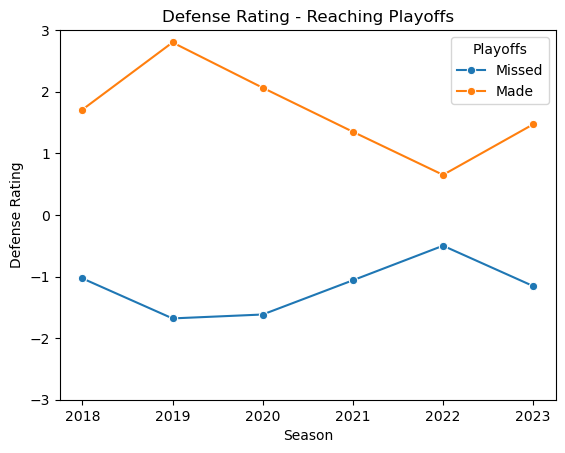

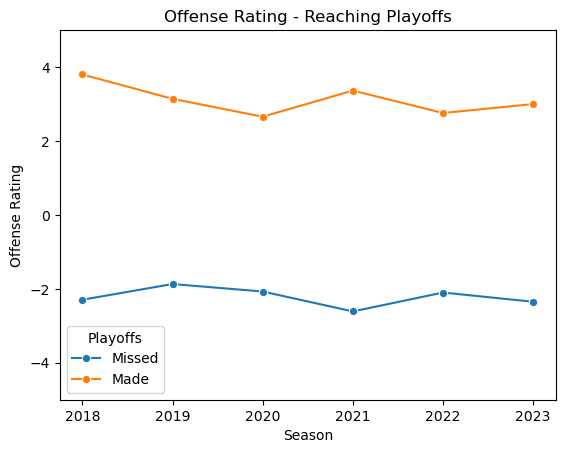

In [ ]:
# Create two line plots to see the differences in Offense Rating and Defense Rating between Playoff and Non-Playoff teams.

df['Season'] = df['Season'].astype(str)

df_line_group = df.groupby(['Season', 'MadePlayoffs'])[['OffenseRating', 'DefenseRating']].mean().reset_index()

sns.lineplot(data=df_line_group, x='Season', y='DefenseRating', hue='MadePlayoffs', marker='o')
plt.title('Defense Rating - Reaching Playoffs')
plt.xlabel('Season')
plt.ylabel('Defense Rating')
plt.ylim(-3, 3)
handles, labels = plt.gca().get_legend_handles_labels()  # Grab existing handles and labels for legend
labels = ['Missed', 'Made'] # Change labels to missed and made
plt.legend(handles, labels, title="Playoffs")

plt.show()

sns.lineplot(data=df_line_group, x='Season', y='OffenseRating', hue='MadePlayoffs', marker='o')
plt.title('Offense Rating - Reaching Playoffs')
plt.xlabel('Season')
plt.ylabel('Offense Rating')
plt.ylim(-5, 5)
handles, labels = plt.gca().get_legend_handles_labels()  # Grab existing handles and labels for legend
labels = ['Missed', 'Made'] # Change labels to missed and made
plt.legend(handles, labels, title="Playoffs")
handles, labels = plt.gca().get_legend_handles_labels()  # Grab existing handles and labels for legend
labels = ['Missed', 'Made'] # Change labels to missed and made
plt.legend(handles, labels, title="Playoffs")

plt.show()

## Splitting the Dataset

- **Training Set:** Used to teach the model patterns in the data.
- **Validation Set:** Used to tune hyperparamters (like depth, regularization, etc).
- **Test Set:** Used at the end to evaluate how well the final model performs on unseen data.

---
### Explanation:
In this step, we prepared our dataset for machine learning by splitting it into training, validation, and test sets. 

- Since `Team` and `Season` are categorical variables, we used dummy encoding to convert them into numerical format. This creates new binary columns for each team and each season, allowing machine learning models to interpret these values without introducing any ordinal bias.
- After encoding, we dropped the original `Team` and `Season` colummns to avoid redundancy.
- We also removed `PlayoffWin`, since it's only relevant after a team has already made the playoffs. Meaning, it would leak future information into our model.
- We defined `X` as our input features (regular season stats) and `y` as our target variable (`MadePlayoffs`) which indicates whether a team qualified for the postseason (1) or (0).
- The dataset was then split using `train_test_split`:
    - First into 80% training+validation and 20% test.
    - Then split again into 60% training and 20% validation.
- We used stratified sampling to maintain the ratio of playoff vs. non-playoff teams in each split.
- A fixed `random_state` ensures that our splits are reporiducible every time we rerun the notebook. 

In [19]:
# Dummy Encode
season_dummies = pd.get_dummies(df["Season"], prefix = "Season")
team_dummies = pd.get_dummies(df["Team"], prefix="Team")
df = pd.concat([df, team_dummies, season_dummies], axis=1)
df = df.drop(columns=["Team", "Season"])

# Drop irrelevant columns
X = df.drop(columns=["MadePlayoffs", "PlayoffWin"])
y = df["MadePlayoffs"]

# Split and train (80%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Split train_val into train (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Training set: (114, 74)
Validation set: (39, 74)
Test set: (39, 74)


## Feature Preparation
In this step, we prepared our feature set for modeling by scaling all numerical input features. We used `StandardScaler`, which standarizes each feature by removing the mean and scaling to unit variance. (mean = 0, standard deviation = 1).

This step is especially important for our Logiistic Regression model, which is sensitive to feature scale. Without scaling, features with large values (i.e. total yards) could disproportionately influnece the model.

Scaling was performed as follows:
- The scaler was fitted only on the training set to prevent data leakage.
- The same tranformation was then applied to the validation and test sets.

For the Random Forest model, feature scaling is not necessary, since tree based models are invariant to feature scale. Therefore, we also kept a copy of the unscaled feature sets specifically for the decision tree model.

In [20]:
#training, validation, test data (for decision tree)
X_train_scaled = X_train.copy()
X_val_scaled =  X_val.copy()
X_test_scaled = X_test.copy()

#Initialize scaler and fit on training data
scaler = StandardScaler()
scaler.fit(X_train)

# Apply scaling (For linear regression)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## Logistic Regression Model
We trained a Logistic Regresio model using the scaled training data. Logistic regression is a linear model that predicts the probability that a team made the playoffs (`MadePlayoffs = 1`) based on its regular season stats.

This model is sensitive to the scale of features, which is why we applied `StandardScalar` earlier. After training, we used the test set to evaluate the model's performance.

### Evaluation Metrics:
- **Accuracy** measures the overall correctness of the model.
- **Precision** shows how accurate the model is when it predicts a team will make the playoffs.
- **Recall** shows how many actual playoff teams were correctly indentified.
- **F1-Score** is the balance of precision and recall.
- **Confusion Matrix** gives a breakdown of correct vs. incorrect predictions:
    - True Positives: predictived playoffs and made playoffs
    - True Negatives: predicted no playoffs and didn't make playoffs
    - False Positives: predicted playoffs, but didn't make it.
    - False Negatives: Predicted no playoffs, actually made it.

In [21]:
# Create Logistic Regression Model with scaled X_train and y_train.
reg_model = LogisticRegression()

reg_model.fit(X_train_scaled, y_train)

# Predict target variable based on scaled X_test.
y_pred = reg_model.predict(X_test_scaled)

# Accuracy score for y_pred, 84.6%.
reg_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy Score: ", reg_accuracy)

# Confusion Matrix for y_pred with 19 TN, 4 FP, 2 FN, 14 TP.
reg_conf_matrix = confusion_matrix(y_test, y_pred)
print("Logistic Regression Confusion Matrix:\n", reg_conf_matrix)

# Precision - accuracy in predicting a team will make the playoffs.
reg_precision = precision_score(y_test, y_pred)
print("Logistic Regression Precision Score: ", reg_precision)

# Recall - accuracy in predicting a team will miss the playoffs.
reg_recall = recall_score(y_test, y_pred)
print("Logistic Regression Recall Score: ", reg_recall)

# F1-Score - combination of precision and recall to help understand the overall model's effectiveness.
reg_f1 = f1_score(y_test, y_pred)
print("Logistic Regression F1-Score: ", reg_f1)

Logistic Regression Accuracy Score:  0.8461538461538461
Logistic Regression Confusion Matrix:
 [[19  4]
 [ 2 14]]
Logistic Regression Precision Score:  0.7777777777777778
Logistic Regression Recall Score:  0.875
Logistic Regression F1-Score:  0.8235294117647058


These results show that the model performs well overall, with a strong balance between precision and recall, especialy in identifying playoff teams. (recall = 87.5%)


### Confusion Matrix (Logistic Regression)
Below we have a plot for the confusion matrix for logistic regression. It shows that it correctly classified 19 non-playoff teams, and 14 playoff teams. There were 4 false positives and 2 false negatives. This suggests that the model is balanced and performs well at both identifying successful and unsuccessful teams.

Overall, this model is pretty strong with 33 out of 39 predictions being correct.


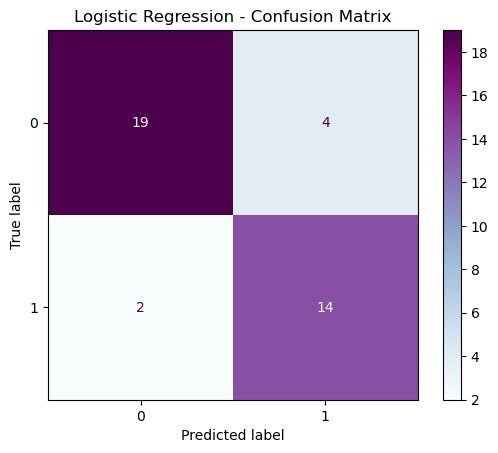

In [29]:
# Graphing the confusion matrix
ConfusionMatrixDisplay.from_estimator(
    reg_model, 
    X_test_scaled, 
    y_test,
    cmap='BuPu',
    colorbar=True
)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

## Random Forest Classifier
We also trained a Random Forest Classifier to predict whether a team made the playoffs based on regular season statistics. Random forests are ensemble models tht work by building multiple decision trees and averaging their predictions, which make them less prone to overfitting than a single decision tree.

Unlike logic regression, random forests:
- Handle nonlinear relationships
- Don't require feature scaling
- Provide feature importance scores

We used the unscaled features for this model, since tree based models aren't affected by different feature magnitudes.

We evaluated the same metrics as before. (Accuracy, Precision, Recall, F1-Score, Confusion Matrix). 
This allows for a direct comparison between the random forest and logistic regression models.

In [34]:
# Initialize Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_model.predict(X_val)

#Print eval
print("Validation Accurary:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report: \n", classification_report(y_val, y_val_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_val, y_val_pred))

importances = rf_model.feature_importances_
features = X_train.columns



Validation Accurary: 0.8717948717948718

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        23
           1       0.87      0.81      0.84        16

    accuracy                           0.87        39
   macro avg       0.87      0.86      0.87        39
weighted avg       0.87      0.87      0.87        39


Confusion Matrix: 
 [[21  2]
 [ 3 13]]


The chart below displays the top 10 most important features used by the Random Forest Classifier to predict playoff qualification. These features had the greatest impact on the model's decision making process.

- The model assigns higher and importance to features that are frequentlky used in its decision trees to split the data
- Features like TeamRating, MarginOfVictory. and Offensive metrics such as TotalYards and PasserRating appear at the tp, indicating strong influence on playoff outcomes.
- Understanding feature importance helps us identify which regular season stats are most critical for predicting postseason success.

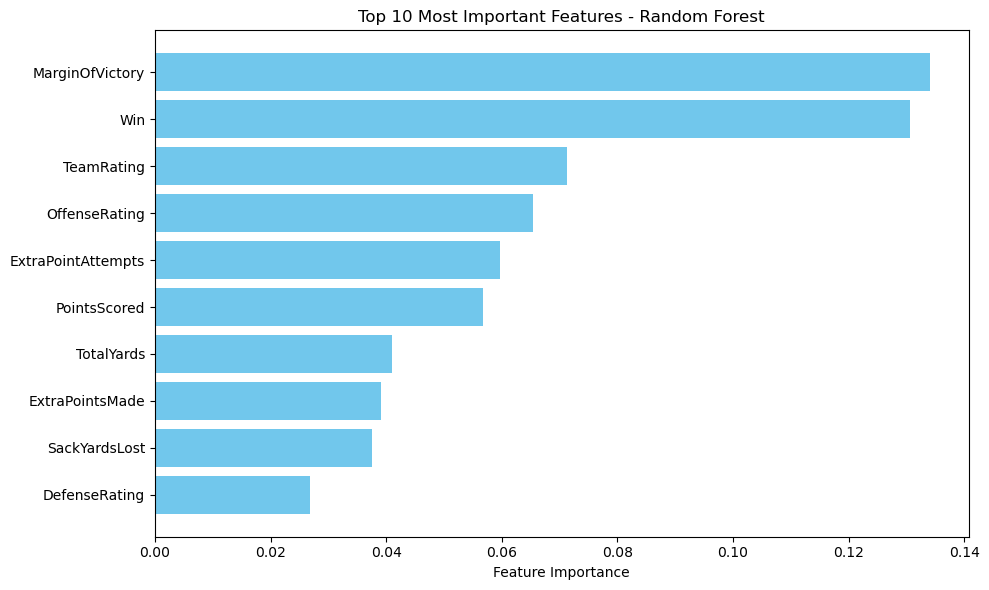

In [35]:
# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(
    y=features[sorted_indices],
    width=importances[sorted_indices],
    color="#71c7ec"  # pastel blue
)
plt.xlabel("Feature Importance")
plt.title("Top 10 Most Important Features - Random Forest")
plt.tight_layout()
plt.show()

Additionally, here is a side by side of both models.

Random Forest Accuracy Score:  0.8717948717948718
Logistic Regression Accuracy Score:  0.8461538461538461
  
Random Forest Confusion Matrix:
 [[21  2]
 [ 3 13]]
Logistic Regression Confusion Matrix:
 [[19  4]
 [ 2 14]]
  
Random Forest Precision Score:  0.8666666666666667
Random Forest Recall Score::  0.8125
Random Forest F1-Score:  0.8387096774193549


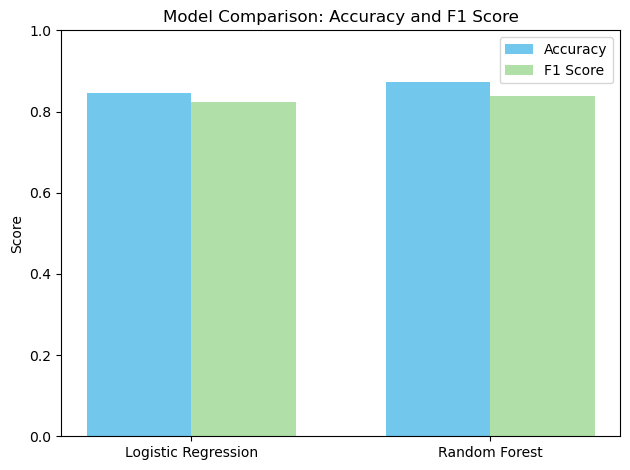

In [38]:
rf_accuracy = accuracy_score(y_val, y_val_pred)
rf_precision = precision_score(y_val, y_val_pred)
rf_recall = recall_score(y_val, y_val_pred)
rf_f1 = f1_score(y_val, y_val_pred)
rf_cm = confusion_matrix(y_val, y_val_pred)

print("Random Forest Accuracy Score: ", rf_accuracy)
print("Logistic Regression Accuracy Score: ", reg_accuracy)
print("  " )
print("Random Forest Confusion Matrix:\n", rf_cm)
print("Logistic Regression Confusion Matrix:\n", reg_conf_matrix)
print("  " )
print("Random Forest Precision Score: ", rf_precision)
print("Random Forest Recall Score:: ", rf_recall)
print("Random Forest F1-Score: ", rf_f1)

# Bar chart comparing models
model_names = ['Logistic Regression', 'Random Forest']
accuracy_scores = [reg_accuracy, rf_accuracy]
f1_scores = [reg_f1, rf_f1]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='#71c7ec')   # pastel blue
ax.bar(x + width/2, f1_scores, width, label='F1 Score', color='#b0e0a8')         # pastel green

ax.set_ylabel('Score')
ax.set_ylim(0, 1)  # optional: set consistent y-axis
ax.set_title('Model Comparison: Accuracy and F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
plt.tight_layout()
plt.show()

These results suggest that the random forest model slightly outperforms logisitic regression in overall accuracy and precision, while logistic regression has a slightly better recall. Both models are well-balanced and show strong predictive capabitlity.

## Hyperparameter Tuning - Logitic Regression
To improve our logistic regression model, we performed hyperparamter tuning using `GridSearchCV`. This technique tests mulitple combinations of parameters to identify the best performing setup using cross validation.

We tested the following hyperparameters:
- `C`: Controls regularization strength (smaller = more regularization).
- `penalty`: Type of regularization used. We tested `l2`.
- `solver`: Optimization algorithm used ('liblinear' and 'lbfgs').
- `max_iter`: Maximum number of iterations to allow convergence.
- `tol`: Tolerance for stopping criteria.
- `class_weight`: Balanced class weights to handle uneven class distribution.



In [26]:
log_reg_tuning = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [2000, 3000, 5000],
    'tol': [1e-4, 1e-5, 1e-6],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(estimator=log_reg_tuning, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

optimal_log_reg_model = grid_search.best_estimator_

test_accuracy = optimal_log_reg_model.score(X_test_scaled, y_test)
test_accuracy

0.8974358974358975

The Hyperparamter tuning significantly improved the model's ability to generalize to unseen data. By fine tuning the solver behavior and regularization strength, we gained a more optimized and reliable model.

## Challenges

### Missing Team-Year Data
- While aggregating the full dataset, we discovered that the 2023 season for teh Indianapolis Colts was missing. To correct this, we created a supplemental file (`Colts_2023_Append.csv`) and appended it manually.

### Inconsistent Team Name Formatting
During the merge with NFL standings data, we found that some team names contained characters like `*` and `+` (e.g., `Chargers*`). These needed to be removed with a regular expression to ensure a successful merge on `Team` and `Season`.

### Model Runtime Issues During GridSearch
When tuning our logistic regression model, some solvers took longer to converge or produced convergence warnings. We fixed this by:
- Increasing `max_iter` to allow more convergence time
- Reducing the number of solvers tested
- Using only the scaled training set for tuning


## Final Evaluation and Conclusion

After training and evaluating two different models, we compared their performance based on accuracy, precision, recall and F1-score.

- **Logistic Regression** performed slightly better on the test set accuracy after tuning, showing that regularization and proper hyperparameter selection helped improve the model.
- ** Random Forest had the highest precision and F1-score, meaning it was very effective at reducing false positives while maintaining strong overall prediction quality.
- Both models had a good balance of Recall, meaning they successfully identified most of the actual playoff teams.

This Project shows that it is possible to accurately predict NFL playoff appearances using regular season team statistics. Both models performed well, but Logistic Regression showed the most improvement after tuning. This highlights the value of hyperparamter optimization and careful model selection.